3) BOW(Bag Of Words)

Bag of Words(BoW) : 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법

가방에 단어들을 넣으면 순서가 중요하지 않음

각 단어에 고유한 인덱스를 부여하고

각 인덱스의 위치에 단어의 출현 횟수를 저장

In [1]:
from konlpy.tag import Okt
import re  

okt=Okt()  

token=re.sub("[.!#~]","",
             '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')
# 형태소 분석
token=okt.morphs(token)  

word2index={}  # 단어 사전(단어와 숫자 인덱스)
bow=[]  # 단어 가방(단어와 출현 횟수)
for voca in token:  
    # 사전에 없는 단어 추가
    if voca not in word2index.keys():  
        word2index[voca]=len(word2index)  
        # 단어의 인덱스와 출현횟수(기본값:1)
        bow.insert(len(word2index)-1,1)
    else:
        # 재등장하는 단어의 인덱스
        index=word2index.get(voca)
        # 단어 카운트 증가
        bow[index]=bow[index]+1

print(word2index)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [2]:
# 단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']
vector = CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_)
print(vector.transform(line).toarray()) # 단어가 출현한 위치에 1 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다. ''']

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
vector = CountVectorizer()
# 코퍼스로부터 각 단어의 빈도수 계산
# 단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())  
# 만들어진 단어와 인덱스
print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [6]:
f=open('../data/text/news1.txt', encoding='UTF-8')
corpus=f.read()
txt=okt.nouns(corpus)
txt2=[' '.join(txt)]
txt2

['오전 수익 오후 널 개미 혼돈 입력 오전 수정 오전 기사 원문 김정은 기자 본문 요약 봇 텍스트 음성 변환 서비스 사용 글자 크기 변경 인쇄 이차전지 파동 개인 대규모 차익 실현 단타 변동성 확대 김 초희 디자이너 서울 뉴스 김정은 기자 요즘 매일 장 리기 젠 내일 어젠 오전 해도 수익 오후 말 그대로 천당 지옥 하루 폭주기관차 관련 주가 이틀 롤러코스터 장세 개인 투자자 혼란 전날 장 변동 폭 를 기록 에코 프로 장 초반 가까이 하락 상승 개인 매도 포지션 여파 일부 점 개인 투자자 한숨 날 오전 에코 프로 전일 대비 하락 거래 에코 프로 날 장 초반 하락 전날 에코 프로 점 이상 순식간 바 장 변동 폭 달 것 에코 프로비 엠 도 장 초반 하락 뒤 수준 낙폭 재차 등 널뛰기 장세 에코 프로비 엠 전날 사상 최고 오전 대비 오후 낙폭 달 장 최고 오후 이후 기록 점 이 급 등락 현상 쇼트스퀴즈 주가 상승 이후 개인 대규모 차익 실현 매도 분석 상승 개인 달 매도 주가 것 한국 거래소 달 전날 개인 에코 프로 달 주가 급등 대규모 차익 실현 나선 것 풀이 또 단타 투자자 도세 주가 낙폭 확대 분석 최 유준 투자 증권 연구원 관련 주 개인 급등 구간 비중 며 최근 추세 상승 개인 매가 가격 외국인 쇼 트스 퀴즈 물량 주가 급등 개인 매도물량 확대 것 고 말 장주 로 개인 투자자 폭 지지 포스코 그룹 상황 현재 포스코 홀딩스 전일 대비 오른 기록 날 하락 장 연 포스코 홀딩스 장 초반 이후 오전 돌연 상승 전환 재차 하락 뒤 현재 폭 포스코 홀딩스 전날 장 초반 해도 급등 고가 기록 오후 하락 전환 뒤 점 비교 장 변동 폭 것 포스코 퓨처 엠 도 전일 대비 하락 기록 포스코 퓨처 엠 역시 장 뒤 상승 다시 하락 등 변동성 보이 포스코 퓨처 엠 전날 기록 오후 점 비교 장 오르락내리락 셈 날 장 초반 홀로 상승 출발 포스코 인터내셔널 은 급락 세 보이 포스코 인터내셔널 전날 포스코 홀딩스 포스코 퓨처 엠 급락 와중 홀로 오른 바']

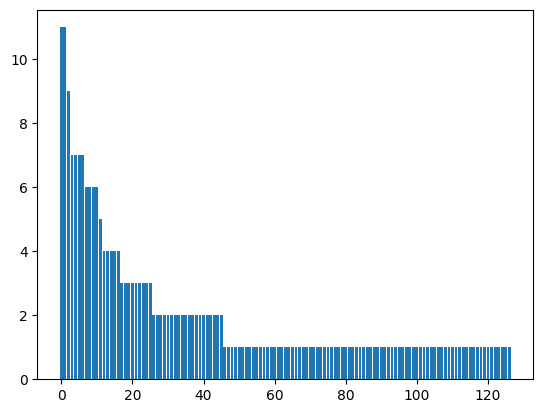

[('포스코', 11), ('개인', 11), ('하락', 9), ('오전', 7), ('상승', 7), ('에코', 7), ('전날', 7), ('기록', 6), ('오후', 6), ('주가', 6), ('초반', 6), ('프로', 5), ('퓨처', 4), ('급등', 4), ('투자자', 4), ('홀딩스', 4), ('대비', 4), ('전일', 3), ('매도', 3), ('변동', 3), ('차익', 3), ('실현', 3), ('확대', 3), ('대규모', 3), ('낙폭', 3), ('이후', 3), ('단타', 2), ('수익', 2), ('비교', 2), ('분석', 2), ('최고', 2), ('보이', 2), ('현재', 2), ('변동성', 2), ('인터내셔널', 2), ('전환', 2), ('오른', 2), ('관련', 2), ('급락', 2), ('재차', 2), ('기자', 2), ('홀로', 2), ('김정은', 2), ('장세', 2), ('프로비', 2), ('해도', 2), ('일부', 1), ('입력', 1), ('장주', 1), ('인쇄', 1), ('증권', 1), ('지옥', 1), ('출발', 1), ('천당', 1), ('혼란', 1), ('혼돈', 1), ('현상', 1), ('한숨', 1), ('한국', 1), ('하루', 1), ('풀이', 1), ('폭주기관차', 1), ('포지션', 1), ('파동', 1), ('트스', 1), ('투자', 1), ('텍스트', 1), ('크기', 1), ('퀴즈', 1), ('이틀', 1), ('추세', 1), ('최근', 1), ('초희', 1), ('지지', 1), ('이차전지', 1), ('가격', 1), ('음성', 1), ('매가', 1), ('리기', 1), ('롤러코스터', 1), ('디자이너', 1), ('등락', 1), ('돌연', 1), ('도세', 1), ('다시', 1), ('뉴스', 1), ('널뛰기', 1), ('매도물량', 1), ('내일

In [7]:
import numpy as np
import matplotlib.pyplot as plt

vect = CountVectorizer().fit(txt2)
# bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-cnt) # 카운트 내림차순 정렬
cnt = cnt[idx]
# x축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]
plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [8]:
# 불용어 추가
vector = CountVectorizer(stop_words=['더'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[ 1  1  1 11  1  1  1  2  1  1  1  1  4  2  6  1  2  2  1  3  1  1  1  1
   2  3  4  1  1  1  1  1  1  1  3  1  1  1  1  3  2  1  2  1  2  2  1  1
   1  7  1  1  1  1  2  1  1  1  3  1  7  1  1  1  1  2  7  6  1  1  1  1
   1  1  1  1  1  1  3  1  2  1  1  2  1  2  7  3  2  6  1  1  1  3  1  6
   1  2  1  1  1  1  1  1  1  4  1  1 11  1  1  1  4  5  2  9  1  1  1  2
   1  2  1  1  4  2  3]]
{'오전': 66, '수익': 54, '오후': 67, '개미': 2, '혼돈': 122, '입력': 82, '수정': 55, '기사': 15, '원문': 72, '김정은': 17, '기자': 16, '본문': 43, '요약': 70, '텍스트': 103, '음성': 74, '변환': 41, '서비스': 51, '사용': 48, '글자': 11, '크기': 102, '변경': 38, '인쇄': 79, '이차전지': 76, '파동': 107, '개인': 3, '대규모': 25, '차익': 93, '실현': 58, '단타': 24, '변동성': 40, '확대': 126, '초희': 96, '디자이너': 30, '서울': 52, '뉴스': 22, '요즘': 71, '매일': 36, '리기': 32, '내일': 20, '어젠': 59, '해도': 119, '그대로': 9, '천당': 94, '지옥': 91, '하루': 116, '폭주기관차': 110, '관련': 7, '주가': 89, '이틀': 77, '롤러코스터': 31, '장세': 83, '투자자': 105, '혼란': 123, '전날': 86, '변동': 39, '기록': 14, '에코': 60, '프로': 113, 